<a href="https://colab.research.google.com/github/simodepth/Stat-Models/blob/main/Exploratory_Data_Analysis_of_Google_Autosuggest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Keyword Research with Semantic Query Analysis


---


This Python model is designed to provide a method start off a preliminary market-oriented analysis to ultimately furnish marketers general tools to dig deep in keyword research.

From a comprehensive trends overview for selected entities, Python libraries with gears of **Pytrends**, **Pandas** and **Serp Api** will guide users across the slippery requirements of serious keyword research settings. 

The goal of this module is, in fact, to provide users with free machine learning tools to kickstart in-depth entity and keyword research. 




#Further Readings

 Here is a set of further references to back up te hard code dropped on this post





- [Ultimate Guide to Pytrends ](https://lazarinastoy.com/the-ultimate-guide-to-pytrends-google-trends-api-with-python/) by Lazarina Stoy
- [Serp API](https://serpapi.com/)
- [Clustering Product Names with Python](https://towardsdatascience.com/clustering-product-names-with-python-part-2-648cc54ca2ac) by Lily Wu
- [Query count, N-Grams and Cluster Analysis for SEO](https://colab.research.google.com/drive/1-rjEyItRQB0K0ptKTa4YyVAKtf8AutJu#scrollTo=CrJl6e_UgJgO ) (**adapted**) by big man Marco Giordano




#Prepare environment
Colab: Enable the GPU runtime

Make sure you enable the GPU runtime to experience decent speed in this tutorial.

**Runtime -> Change Runtime type -> Hardware accelerator -> GPU**

<img src="https://raw.githubusercontent.com/deepset-ai/haystack/main/docs/img/colab_gpu_runtime.jpg">

In [ ]:
!pip install brewer2mpl
!pip install google-search-results
!pip install pytrends
!pip install requests_html
from IPython.display import clear_output




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for google-search-results: filename=google_search_results-2.4.1-py3-none-any.whl size=25789 sha256=bb5ecd80a30e1ca167327922fe899e0f5018176ae7a429f1307ec9c6e807a70e
  Stored in directory: /root/.cache/pip/wheels/82/a3/c5/364155118f298722dff2f79ae4dd7c91e92b433ad36d6f7e0e
Successfully built google-search-results
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16126 sha256=6045a023c74b13f899b148eeaa084fcd254baecfa1c35854171e1ef45829dc50
  Stored in directory: /root/.cache/pip/wheels/07/6f/5c/8174f98dec1bfbc7d5da4092854afcbcff4b26c3d9b66b5183
Successfully built pytrends
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/pu

In [ ]:
import requests
import pandas as pd
import json
from serpapi import GoogleSearch
import urllib
import urllib.parse
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import operator
from requests_html import HTML
from requests_html import HTMLSession
from urllib.parse import (parse_qsl, urlsplit)
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0
clear_output()
print('All loaded.')

All loaded.


#Use Pytrends to find Interest Over Time for a set of Entities (UK) 

In [ ]:
from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-GB', tz=360, timeout=(5,15))


In [ ]:
#import the keywords file

colnames = ["keywords"]
df = pd.read_excel("/content/Keyword.xlsx", names=colnames)
df2 = df["keywords"].values.tolist()



In [ ]:

#set up the dataframe and loop for pytrends

dataset = []

for x in range(0,len(df2)):
     keywords = [df2[x]]
     pytrends.build_payload(
     kw_list=keywords,
     cat=0,
     timeframe='2022-06-26 2022-09-23',
     geo='GB')
     data = pytrends.interest_over_time()
     if not data.empty:
          data = data.drop(labels=['isPartial'],axis='columns')
          dataset.append(data)


/usr/local/lib/python3.7/dist-packages/pytrends/request.py:193: ResourceWarning: unclosed <ssl.SSLSocket fd=53, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 60390), raddr=('74.125.135.103', 443)>
  trim_chars=4,
/usr/local/lib/python3.7/dist-packages/pytrends/request.py:230: ResourceWarning: unclosed <ssl.SSLSocket fd=53, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 60400), raddr=('74.125.135.103', 443)>
  params=over_time_payload,
/usr/local/lib/python3.7/dist-packages/pytrends/request.py:193: ResourceWarning: unclosed <ssl.SSLSocket fd=53, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 60416), raddr=('74.125.135.103', 443)>
  trim_chars=4,
/usr/local/lib/python3.7/dist-packages/pytrends/request.py:230: ResourceWarning: unclosed <ssl.SSLSocket fd=53, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 60432), raddr=('74.

In [ ]:
#merge the results
result = pd.concat(dataset, axis=1)
result.head()

,coffee,tea,soda,lemonade,juice
date,,,,,
2022-06-26,86,96,68,60,75
2022-06-27,78,81,54,41,68
2022-06-28,77,79,53,44,63
2022-06-29,75,86,54,40,73
2022-06-30,74,83,59,42,63


In [ ]:
#@title Download Full Results
result.to_csv('search_trends.csv')

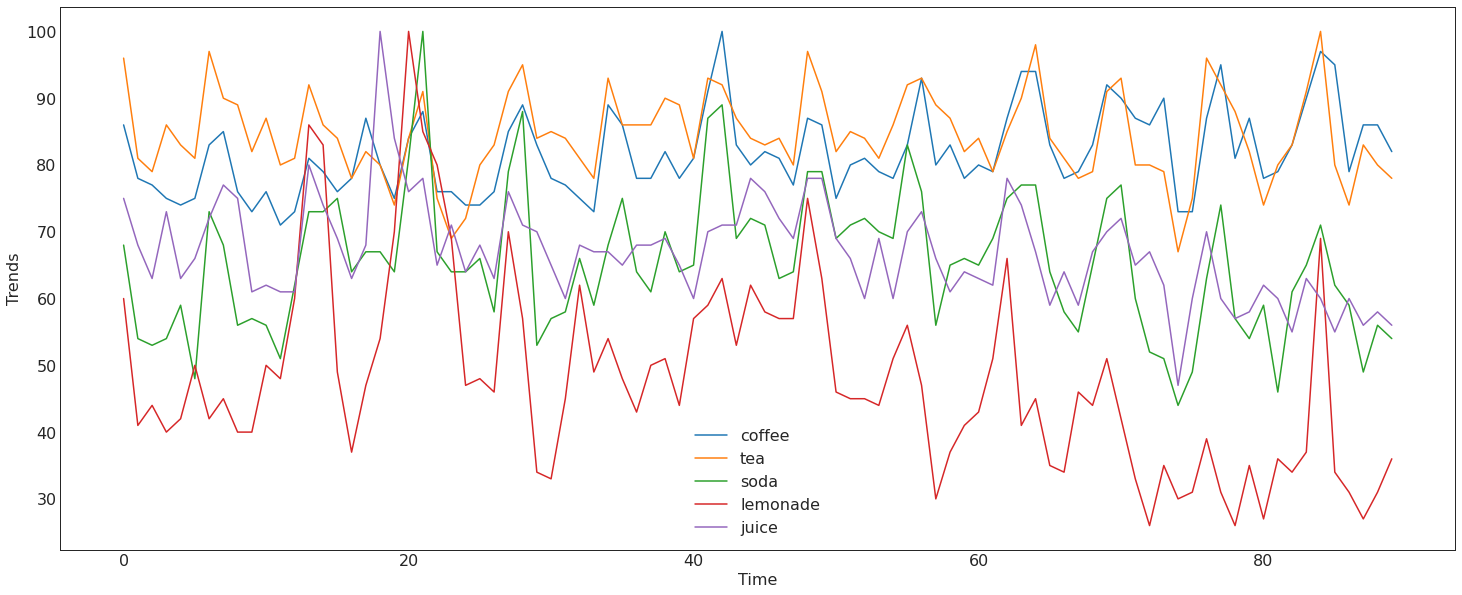

In [ ]:
#@title Visualize Trends https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/
df = pd.read_csv(r'/content/search_trends.csv')  #@param {type: "string"}
df.plot(xlabel="Time", ylabel="Trends",figsize=(25,10), kind="line")



#Fetch the Entity Suggestions from the Top Trending Keyword


---
Given that "Coffee" leads the trending topics among the beverage sector in the UK in the last 8 months, we can start to investigate further about the spectrum of the existing entity comnections

For this reason, we are going to expand now on:
- Primary Related Entities from Google Autosuggest
- Secondary Related Entities (or Related Queries) from Google's Related Search   


In [ ]:
#@title Related Entities from Google Autcomplete
keywords = pytrends.suggestions('coffee')
df = pd.DataFrame(keywords)
cols = ['mid', 'Entity', 'Meaning']
df.columns = cols
df=df.drop("mid",axis=1)
df


,Entity,Meaning
0,Coffee,Drink
1,Coffeemaker,Topic
2,Starbucks,Coffeehouse company
3,Coffee bean,Topic
4,Coffee,Plant


The names I attributed to this data frame's columns are not casual.

"Coffee" is a physical and tangible sign, which embed a wider span of meanings depending on cultural values as well as psychographic features of a given civilization. However, from a semiotic standpoint the main meaning of "Coffee" sits primarily with the one of a "Drink" as it's possibly the very first association that comes to mind to pretty much all of use - hopefully.

In poor semiotic terms, **an Entity is a sign that depends on a spectrum of inner meanings and relate to a hundred others**


In [ ]:
#@title Setting Up connection with Google SERPs

def get_source(url):

    try:
        session = HTMLSession()
        response = session.get(url)
        return response
    except requests.exceptions.RequestException as e:
        print(e)

def get_results(query):
    query = urllib.parse.quote_plus(query)
    response = get_source("https://suggestqueries.google.com/complete/search?output=chrome&hl=en&q=" + query)
    results = json.loads(response.text)
    return results

In [ ]:
#@title Type your Keyword
lang_code = "en-gb"  #@param {type:"string"}
search_term = "coffee " #@param {type:"string"}
results = get_results(search_term)
results

/usr/local/lib/python3.7/dist-packages/IPython/lib/pretty.py:475: ResourceWarning: unclosed <ssl.SSLSocket fd=75, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 39426), raddr=('74.125.20.113', 443)>
  self.depth = depth


['coffee ',
 ['coffee near me',
  'coffee nearby',
  'coffee shops near me',
  'coffee table',
  'coffee maker',
  'coffee shop',
  'coffee bean',
  'coffee cake'],
 ['', '', '', '', '', '', '', ''],
 [],
 {'google:clientdata': {'bpc': False, 'tlw': False},
  'google:suggestrelevance': [1250, 601, 600, 554, 553, 552, 551, 550],
  'google:suggestsubtypes': [[512, 433, 457],
   [512, 433],
   [512, 433],
   [512],
   [512, 433, 131],
   [512, 433],
   [512, 433, 131],
   [512, 433, 131]],
  'google:suggesttype': ['QUERY',
   'QUERY',
   'QUERY',
   'QUERY',
   'QUERY',
   'QUERY',
   'QUERY',
   'QUERY'],
  'google:verbatimrelevance': 851}]

In [ ]:
#@title Format Results
def format_results(results):
    suggestions = []
    for index, value in enumerate(results[1]):
        suggestion = {'term': value, 'relevance': results[4]['google:suggestrelevance'][index]}
        suggestions.append(suggestion)
    return suggestions

formatted_results = format_results(results)
formatted_results

[{'term': 'coffee near me', 'relevance': 1250},
 {'term': 'coffee nearby', 'relevance': 601},
 {'term': 'coffee shops near me', 'relevance': 600},
 {'term': 'coffee table', 'relevance': 554},
 {'term': 'coffee maker', 'relevance': 553},
 {'term': 'coffee shop', 'relevance': 552},
 {'term': 'coffee bean', 'relevance': 551},
 {'term': 'coffee cake', 'relevance': 550}]

🔗 **"Relevance"**  refers to an automated estimation based on the frequency that specific term is subjected to in the search results page

In [ ]:
#@title Add Suffixes to Search Terms

def get_expanded_term_suffixes():
    expanded_term_suffixes = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
                             'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
    return expanded_term_suffixes

In [ ]:
#@title Add Keyword Modifier
def get_expanded_term_prefixes():
    expanded_term_prefixes = ['what *', 'where *', 'how to *', 'why *', 'buy*', 'how much*',
                              'best *', 'worse *', 'rent*', 'sale*', 'offer*','vs*','or*'
                             ]
    return expanded_term_prefixes

Keyword Modifier Repo:

```
# ['what *', 'where *', 'how to *', 'why *', 'vs*', 'or*', 'buy*', 'how much*',
                              'best *', 'worse *', 'tutorial *', 'tips *', 'ideas *', 'review *', 'guide *' 
                             ]
```

In [ ]:
#@title Expand the Search
def get_expanded_terms(query):

    expanded_term_prefixes = get_expanded_term_prefixes()
    expanded_term_suffixes = get_expanded_term_suffixes()   

    terms = []
    terms.append(query)

    for term in expanded_term_prefixes:
        terms.append(term + ' ' + query)

    for term in expanded_term_suffixes:
        terms.append(query + ' ' + term)

    return terms

#Look for further suggestions

def get_expanded_suggestions(query):

    all_results = []

    expanded_terms = get_expanded_terms(query)
    for term in expanded_terms:
        results = get_results(term)
        results = format_results(results)
        all_results = all_results + results
        all_results = sorted(all_results, key=lambda k: k['relevance'], reverse=True)
    return all_results


In [ ]:
#@title Print the Output and get the data frame
expanded_results = get_expanded_suggestions(search_term)
expanded_results_df = pd.DataFrame(expanded_results)
expanded_results_df.columns = ['Keywords', 'Relevance']
expanded_results_df.to_csv('results.csv')
pd.set_option('display.max_rows',expanded_results_df.shape[0]+1)
expanded_results_df.drop_duplicates('Keywords')
expanded_results_df

/usr/lib/python3.7/http/cookiejar.py:1748: ResourceWarning: unclosed <ssl.SSLSocket fd=75, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 37894), raddr=('74.125.20.113', 443)>
  return deepvalues(self._cookies)
/usr/lib/python3.7/threading.py:1264: ResourceWarning: unclosed <ssl.SSLSocket fd=75, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 37914), raddr=('74.125.20.113', 443)>
  return list(_active.values()) + list(_limbo.values())
/usr/lib/python3.7/threading.py:1264: ResourceWarning: unclosed <ssl.SSLSocket fd=77, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 37924), raddr=('74.125.20.113', 443)>
  return list(_active.values()) + list(_limbo.values())
/usr/lib/python3.7/threading.py:1264: ResourceWarning: unclosed <ssl.SSLSocket fd=78, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 37940), raddr=('74.125.20.113', 44

,Keywords,Relevance
0,coffee near me,1250
1,coffee bean,1250
2,coffee house,1250
3,coffee jelly,1250
4,coffee near me,1250
5,coffee quotes,1250
6,coffee shops near me,1250
7,coffee vs tea,1250
8,coffee x change,1250
9,coffee yom kippur,1250


If you want to be more granular, you can check those queries that are below the 80th quantile of the query datase for Relevance.

In layman's term, we are filtering out all the fat-head entities that you will hardly ever target to focus on more granular queries that are deemed as less relevant than the other 20% of the top of the dataset but are likely more approachable in your strategy.

In [ ]:
top_relevance = expanded_results_df[expanded_results_df['Relevance'] <= expanded_results_df['Relevance'].quantile(0.8)]
top_relevance.to_csv('top relevance.csv')
top_relevance


,Keywords,Relevance
40,coffee nearby,601
41,what coffee is good for weight loss,601
42,where coffee was invented,601
43,how to coffee art,601
44,why coffee makes you poop,601
45,buy coffee,601
46,how much coffee per cup,601
47,best coffee near me,601
48,worst coffee,601
49,rent coffee machine,601


"what coffee is good for weight loss" looks like an interesting search query opening up to a plethora of interesting topics carved in a fancy niche.

I'm going to keep a record about this query as it'll likely turn out very useful in a while.

#Keyword Clusterization


---
Once you have your query list returned, you can make a step forward and aim at creating clusters that will help you better classify topics Google suggests

The method will consider a number of steps:

- **Preprocessing** the text (the food names) into clean words so that we can turn it into numerical data.

- **Vectorisation** which is the process of turning words into numerical features to prepare for machine learning.

- **Applying K-means clustering**, an unsupervised machine learning algorithm, to group query names with similar words.
- **Assessing cluster quality** through cluster labelling and visualisation.
- **Finetuning** steps 1–4 to improve cluster quality.


In [ ]:
#Install Dependencies

!pip install fuzzywuzzy
!pip install plotly
!pip install gensim

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import plotly.express as px

#Libraries for preprocessing
from gensim.parsing.preprocessing import remove_stopwords
import string
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize

#Download once if using NLTK for preprocessing
import nltk
nltk.download('punkt')

#Libraries for vectorisation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from fuzzywuzzy import fuzz

#Libraries for clustering
from sklearn.cluster import KMeans

#Open the Output
df = pd.read_csv('results.csv')
text1 = df['Keywords']

/usr/local/lib/python3.7/dist-packages/IPython/core/inputtransformer2.py:109: ResourceWarning: unclosed <ssl.SSLSocket fd=78, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 41924), raddr=('74.125.20.113', 443)>
  for i, ti in enumerate(token_line):
/usr/local/lib/python3.7/dist-packages/IPython/core/inputtransformer2.py:109: ResourceWarning: unclosed <ssl.SSLSocket fd=79, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 41938), raddr=('74.125.20.113', 443)>
  for i, ti in enumerate(token_line):
/usr/local/lib/python3.7/dist-packages/IPython/core/inputtransformer2.py:109: ResourceWarning: unclosed <ssl.SSLSocket fd=80, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 41954), raddr=('74.125.20.113', 443)>
  for i, ti in enumerate(token_line):
/usr/local/lib/python3.7/dist-packages/IPython/core/inputtransformer2.py:109: ResourceWarning: unclosed <ssl.SSLSocket fd=81, f

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/google/colab/_pip.py:83: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/fuzzywuzzy-0.18.0.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/matplotlib/_pylab_helpers.py:76: ResourceWarning: unclosed <ssl.SSLSocket fd=76, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 37900), raddr=('74.125.20.113', 443)>
  gc.collect(1)
/usr/local/lib/python3.7/dist-packages/matplotlib/_pylab_helpers.py:76: ResourceWarning: unclosed <ssl.SSLSocket fd=82, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 37976), raddr=('74.125.20.113', 443)>
  gc.collect(1)
/usr/local/lib/python3.7/dist-packages/matplotlib/_pylab_helpers.py:76: ResourceWarning: unclosed <ssl.SSLSocket fd=75, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 38062), raddr=('74.125.20.113', 443)>
  gc.collect(1)
/usr/local/lib/python3.7/dist-packages/matplotlib/_pylab_helpers.py:76: ResourceWarning: unclosed <ssl.SSLSocket fd=87, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 41

#Preprocessing


---

Within the Preprocessing stage of the analysis, also known as [Tokenization](https://seodepths.com/python-for-seo/how-to-kick-off-entity-research-nlp-python/), we remove unnecessary characters and words from the query text to only keep the meaningful values.

There are several Tokenization techniques and their selection varies on the use case. 

For this tutorial, we are going to leverage some of the most popular:

- Removing stopwords, punctuation and numbers
Stopwords are the common words in language like ‘the’, ‘a’, ‘is’, ‘and’. We’ll remove stopwords using the Gensim library, and punctuation and numbers using the String library.

- Stemming words
Just like in the event of any basic [entity and sentiment analysis in NLP](https://seodepths.com/python-for-seo/entity-and-sentiment-analysis-python/),stemming is a tokenization technique that consists in shortening words to their root form. For example  "apple" and "apples" refer to the stem: "appl" and are treated as the same word in the vectorisation stage.

There are several types of stemmers as well and the Porter's is by far the most popular as it is available in the python NLTK module and it is also language independent. However, the Snowball stemmer works **language specific** and might return better results.


In [ ]:
#Remove stopwords, punctuation and numbers
text2 = [remove_stopwords(x)\
        .translate(str.maketrans('','',string.punctuation))\
        .translate(str.maketrans('','',string.digits))\
        for x in text1]

#Stem and make lower case
def stemSentence(sentence):
    stemmer = SnowballStemmer('english')
    token_words = word_tokenize(sentence)
    stem_sentence = [stemmer.stem(word) for word in token_words]
    return ' '.join(stem_sentence)

text3 = pd.Series([stemSentence(x) for x in text2])






#Vectorizing our Queries


---

Vectorisation is the process of turning cleaned text into numerical data so that we can perform statistical analysis on it.
Again, there are plenty of techniques to choose from. 

- Bag of words: a basic model that counts the occurrences of words in a document, but still this is a very basic count of words which fails to properly extract the underlying meaning

- TF-IDF (word level): measures the frequency of a word in a document and compares it to the frequencies of all words in the text to assign it a weighted score of importance.
- TF-IDF (n-grams level): measures the frequency of sequences of words. In this scenario, we are going to use the **ngram_range** parameter focus solely on n-grams between 1 (individual words) and 2 (sequences of 2 words or bi-grams).



In [ ]:
#Bag of words
vectorizer_cv = CountVectorizer(analyzer='word')
X_cv = vectorizer_cv.fit_transform(text3)

#TF-IDF (word level)
vectorizer_wtf = TfidfVectorizer(analyzer='word')
X_wtf = vectorizer_wtf.fit_transform(text3)

#TF-IDF (n-gram level)
vectorizer_ntf = TfidfVectorizer(analyzer='word',ngram_range=(1,2))
X_ntf = vectorizer_ntf.fit_transform(text3)



But the proper "coup de theatre" of the vectorisation comes with the application of the LDA algorithm.

Latent Dirichlet Allocation (LDA) is a probabilistic unsupervised learning model typically used as a threshold for [Topic Modelling](https://seodepths.com/python-for-seo/topic-modelling-content-strategy/#lda-training-model-setup) tasks. The idea behind the algorithm is to parse multiple words in a document
to probabilistically estimate the topics. Essentially, the algorithm assumes each text corpora is made up of several topics and similar topics use similar words. 

Here is the result at 30 topics and the top 5 words per topic extracted from  the original dataset of scraped queries.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


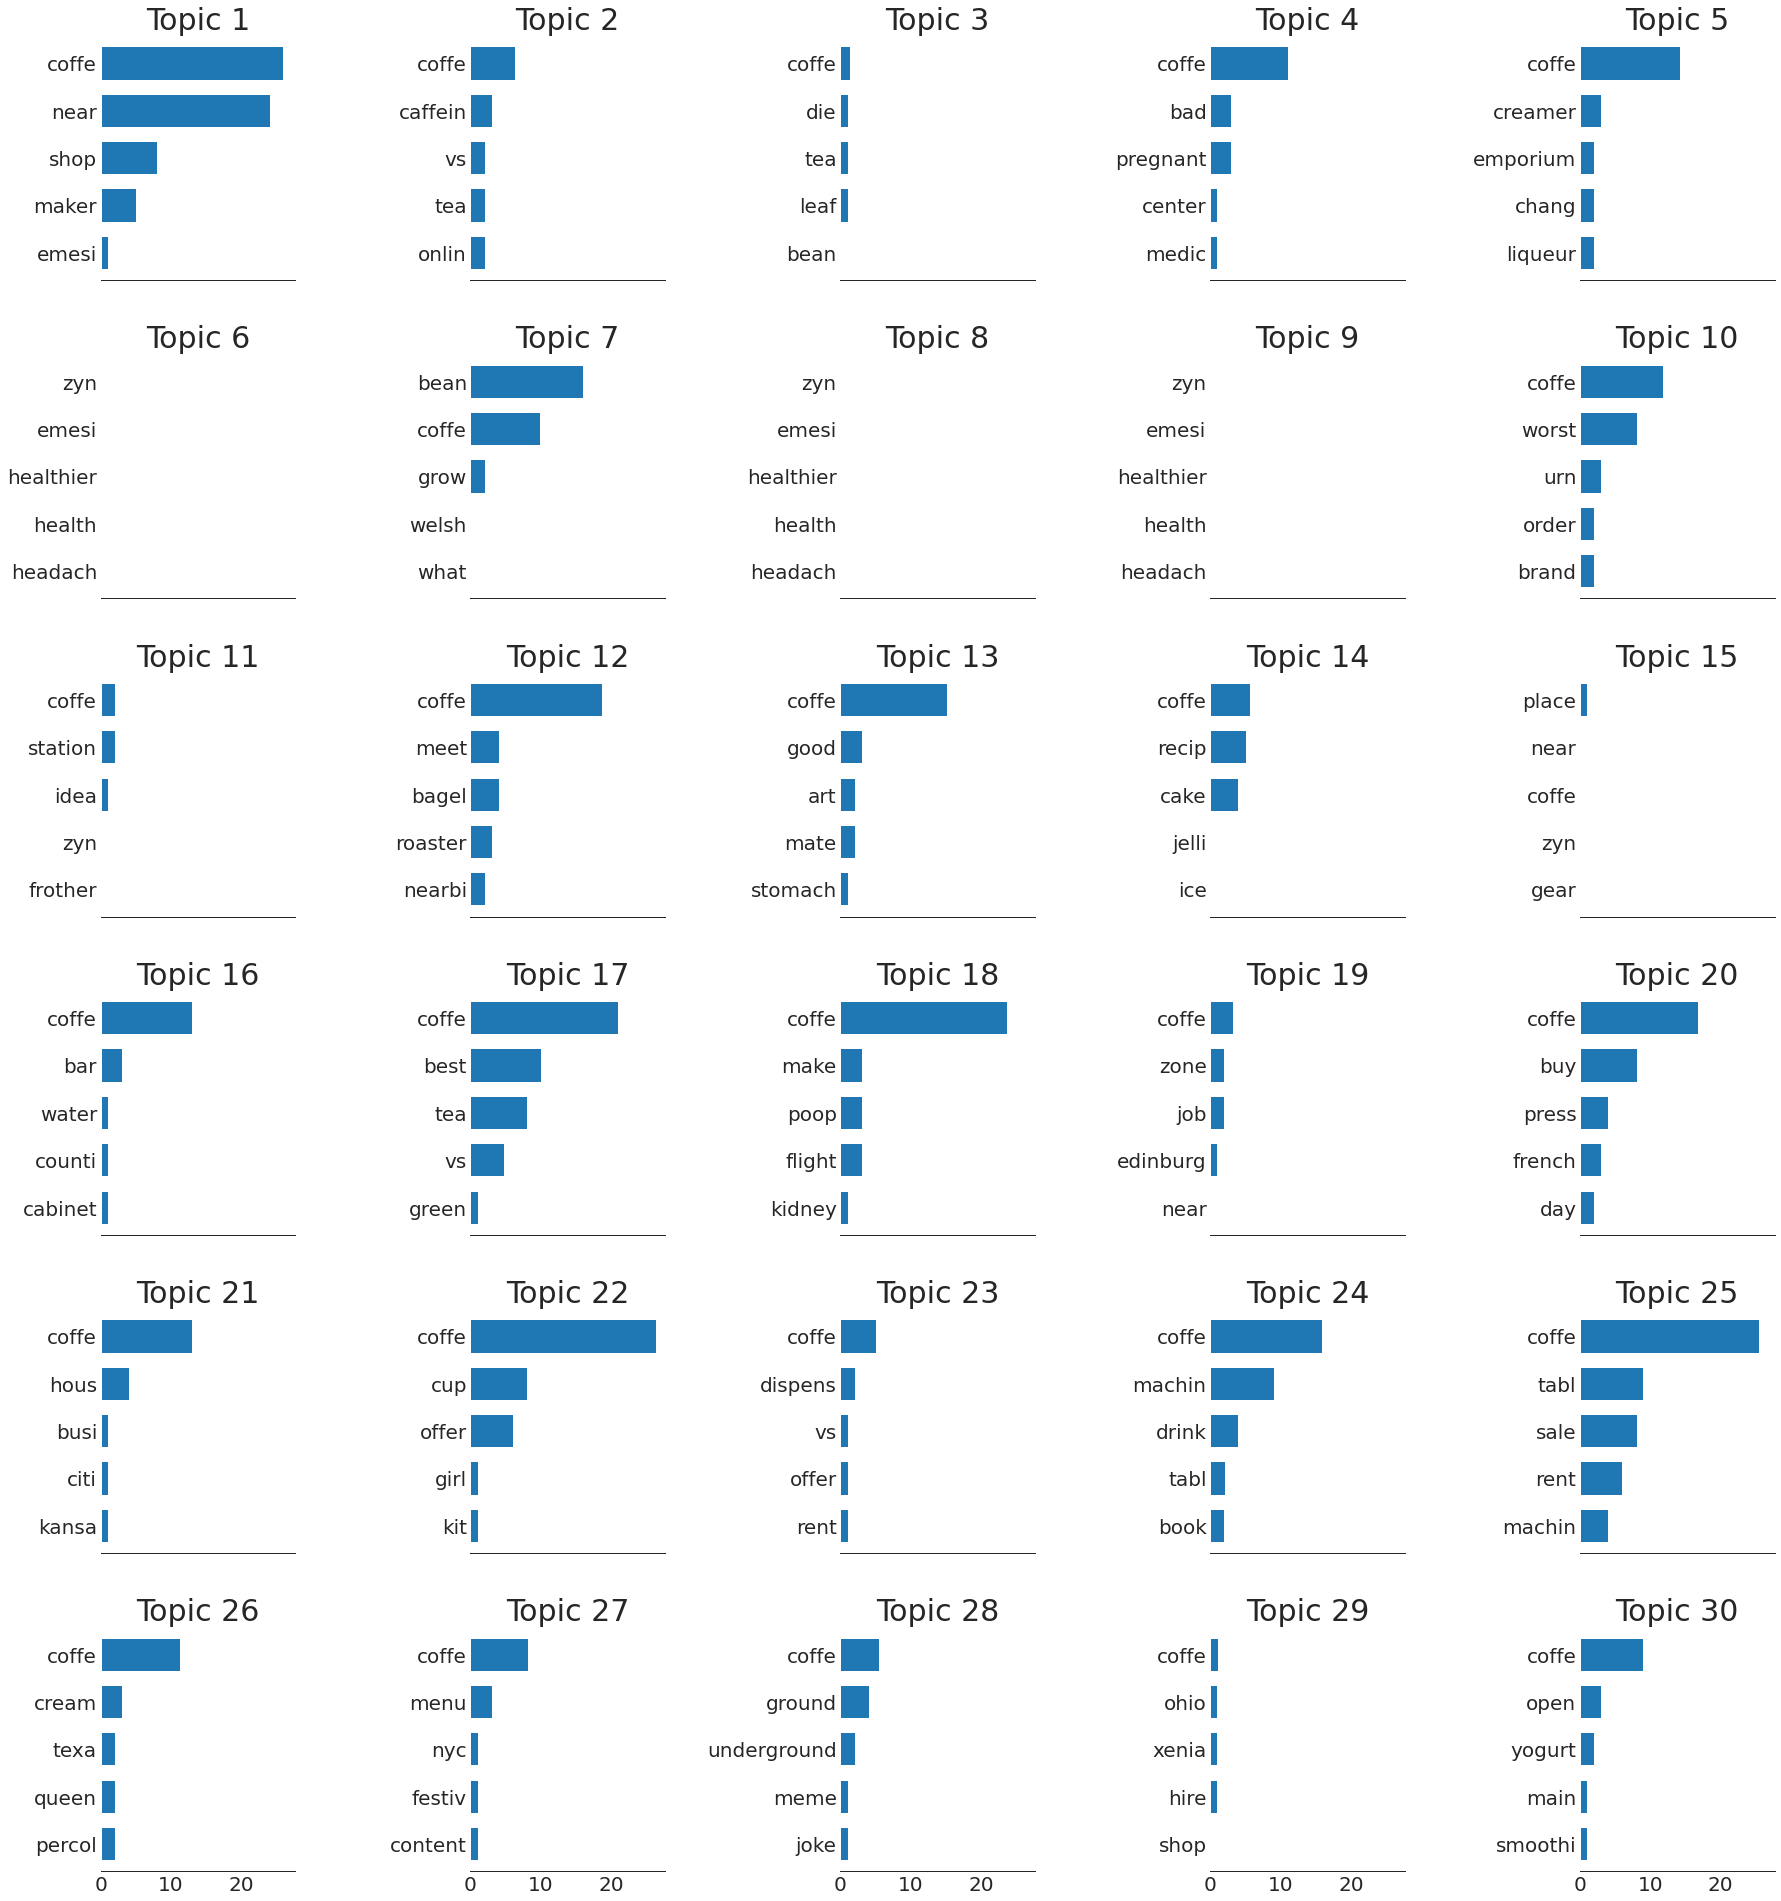

In [ ]:
#LDA
lda = LatentDirichletAllocation(n_components=30, learning_decay=0.9)
X_lda = lda.fit(X_cv)

#Plot topics function. Code from: https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(6, 5, figsize=(30, 30), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
#Show topics
n_top_words = 5
feature_names = vectorizer_cv.get_feature_names()
plot_top_words(X_lda, feature_names, n_top_words, '')

#Fuzzywuzzy


---


The last stage of vectorisation is to calculate a similarity score between two strings. Fuzzywuzzy applies fuzzy matching, or the calculation of similarity between strings worded slightly differently (as opposed to exact-match) that would yield a high similarity score.

Here is a matrix showcasing each coffee query and its similarity score with every other coffee word.
Please note that the similarity score ranges from 0-100

In [ ]:
#Fuzzywuzzy
X_fuzz = pd.crosstab([text3.index,text3],text3).apply(lambda col: [fuzz.token_sort_ratio(col.name, x) 
                                                                   for x in col.index.get_level_values(1)])
X_fuzz.head()


,col_0,best coffe,best coffe bean,best coffe california,best coffe grinder,best coffe machin,best coffe maker,best coffe near,best coffe texa,buy coffe,buy coffe bean,...,sale coffe tabl book,starbuck offer coffe day,what coffe bean welsh,worst coffe,worst coffe brand,worst coffe creamer,worst coffe machin,worst coffe maker,worst coffe order,worst coffe world
row_0,row_1,,,,,,,,,,,,,,,,,,,,,
0,coffe near,50,40,32,50,52,62,80,64,53,42,...,47,53,52,67,52,62,57,59,52,52
1,coffe bean,80,80,65,57,59,62,64,64,74,83,...,47,29,65,48,67,34,36,37,37,37
2,coffe hous,50,40,32,43,52,46,48,48,53,42,...,47,47,45,76,59,55,64,59,59,59
3,coffe jelli,48,38,31,48,50,52,54,54,50,40,...,52,40,50,55,43,47,48,50,50,50
4,coffe near,50,40,32,50,52,62,80,64,53,42,...,47,53,52,67,52,62,57,59,52,52


#Cluster Analysis with K-means


---

K-means is a machine learning algorithm often employed in unsupervised learning for clustering problems.

Despite being time-consuming and biased especially on equal sized clusters, the k-means allocates data points into discrete groups based on their similarity or proximity to each other.

What we have to do is to **specify the number of clusters K** and the algorithm will assign each observation to a cluster until each cluster's observations are as close as possible to its mean (centroid)

##K-Means Clustering: How Does it Work?
Being an unsupervised machine learning model, K-means require only a few manual inputs to kick it off.

- Select the number of clusters you want to identify (depending on whether you've got a predefined sample of cases)
- The Kmeans algorithm will select a number of random data points (centroids)that match the number of clusters. That's the first stage of connections (external clustering)
- The algorithm calculates the distances between each point(centroids) to each cluster point
Within each cluster, the algorithm would start identify the closest data points in its range (internal clustering)
- Calculate the mean of each cluster and assign it as the new cluster centroid
- Redefine clusters, thereby assigning a new mean as the next cluster centroid
- Rinse and repeat the process as long as you identify clusters that minimize errors: SSE [Distortion], or the distances of all points within a cluster from the centroid of other points

TL;DR **SSE stands for the difference between the observed value and the predicted value**

##Identifying the Best Number of Clusters
You can't improvise to draw up the feasible number of clusters to assign to the K-means. There is, in fact, a method that will help us select the optimal number of clusters. 

For this purposes, we are going to use the traditional **Elbow method** that will define a range of K values to run k-means clustering on, and evaluate the SSE (Distortion) for the model using each of the defined numbers of clusters.

#What's the thing about the Elbow Method?
The Elbow Method, as the name suggests, will provide a breaking scree plot. The data point where the plot cracks represents the number of clusters that you'd be better picking up


---



The best data source to apply the Elbow method is probably our bespoke Bag of Words as it encloses a count of word occurrences

###Please note that the more clusters you subit to the check of the Elbow Method the longer it's going to take to the script to process the parsing requests

In [ ]:
#@title Refreshing about Bag of Words Query Count
text3.count()

320

In [ ]:
#@title Applying the Elbow Method
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

#setting the model
features, labels = make_blobs(
    n_samples=320,
    centers=5
)
 
# Instanciate the model by assigning the K-means a a hypothetical number of clusters
# and 10 iterations with different centroid seed 
model = KMeans(
    n_clusters=10,
    n_init=10,
    random_state=42
    )
 
# train the model
model.fit(features)
 
# make a prediction on the data
p_labels = model.predict(features)

In [ ]:
#@title Visualize the Scree Plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

ks = range(1,320)

ssr = []
# For each cluster K
for k in ks:
    # create model instance of K clusters
    model = KMeans(n_clusters=k, max_iter=1000).fit(X_cv)
 
 
    # append the inertial to a list
    ssr.append(model.inertia_)
     
# Plot
plt.plot(ks, ssr, '-o')
plt.xlabel('Clusters (k)')
plt.ylabel('SSR')
plt.xticks(ks)
plt.title('Elbow method for optimal K')
plt.axvline(x=5,linestyle='--',c='grey')
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: ConvergenceWarning: Number of distinct clusters (272) found smaller than n_clusters (273). Possibly due to duplicate points in X.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: ConvergenceWarning: Number of distinct clusters (272) found smaller than n_clusters (274). Possibly due to duplicate points in X.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: ConvergenceWarning: Number of distinct clusters (272) found smaller than n_clusters (275). Possibly due to duplicate points in X.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: ConvergenceWarning: Number of distinct clusters (272) found smaller than n_clusters (276). Possibly due to duplicate points in X.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: ConvergenceWarning: Number of distinct clusters (272) found


The elbow point looks to be at 300. The decline in SSE after this point starts to get increasingly smaller.

In [ ]:
#@title Create clusters
kmeans = KMeans(n_clusters=100)
kmeans.fit(X_cv)
result = pd.concat([text1,pd.DataFrame(X_cv.toarray(),columns=vectorizer_cv.get_feature_names())],axis=1)
result['cluster'] = kmeans.predict(X_cv)
result[['Keywords','cluster']]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Keywords,cluster
0,coffee near me,14
1,coffee bean,4
2,coffee house,34
3,coffee jelly,35
4,coffee near me,14
5,coffee quotes,60
6,coffee shops near me,12
7,coffee vs tea,53
8,coffee x change,37
9,coffee yom kippur,84


Note:To process this clustering task it is pivotal to  compare matrices having mutually exclusive data points.
In other words, you can use SSE to compute a clustering task only on one single type of matrice. For example, we used the bag of words which uses integers (0, 1, 2, etc.) to represent the occurrence of a word. 
Alternatively, we could have used the TF-IDF (words/n-grams) using float (0.1,0.2,0.3) but we would have never mixed it up with any other matrices using different data values

In [ ]:
#@title Label each cluster
#give a name to each cluster to improve readability. To do so, we're going to replace the numerical values with the related categorical value

clusters = result['cluster'].unique()
labels = []
for i in range(len(clusters)):
    subset = result[result['cluster'] == clusters[i]]
    words = ' '.join([x for x in np.where(subset.all()!=0,subset.columns,None) if x and x!='Keywords' and x!='cluster' and len(x.split()) == 1])
    labels.append(words)
labels_table = pd.DataFrame(zip(clusters,labels),columns=['cluster','label'])
result_labelled = pd.merge(result,labels_table,on='cluster',how='left')

In [ ]:
#@title Clusters sizing
pd.pivot_table(result_labelled,index=['label'],values=['Keywords'],aggfunc='count').sort_values(['Keywords'], ascending=False)

,Keywords
label,
coffe,109
coffe near,13
bean coffe,10
coffe machin,8
coffe tabl,8
coffe cup,8
coffe rent,6
coffe vs,5
coffe worst,4


At K=106 with the bag of words matrix, 106 out of 320 query names weren't labelled and 52 queries are in clusters of 1. Overall 33% of the query names were grouped into a clean cluster. 

Should have we done more? I don't rule it out. However, the dataset we've been wroking on allowed little to no advantageous amendments. This is genuinely what Google Autosuggest suggested as this is what it is programmed for. Nevertheless, you could defenitvely play around with the number of clusters to see whether you can minimize outliers and importantly aim to cluster as many queries as possible. 


As far as I'm concerned, I've been trying with 150,160,80,90  and even 60 to strike the right balance. Though, all I ever found was either too many query names left unlabelled (excluded from the clusterization) or too many unique clusters.
None of the solutions would have helped, hence I agreed to make a compromise to wards leaving some query names out of the process and collecting a few unique clusters.


In [ ]:
#@title Clusters Treemap
result_summary = pd.pivot_table(result_labelled,index=['label'],values=['Keywords'],aggfunc='count').reset_index().rename(columns={'Keywords':'count'})
result_treemap = result_summary[(result_summary['label'] != '') & (result_summary['count'] > 1)]
fig = px.treemap(result_treemap,path=['label'],values='count')
fig.show();

A treemap visualization created with Plotly displays undoubtedly the clearest picture of the entire cluster analysis of our query dataset.

What we can learn from this is that Google seems prone to suggest "Coffee" search queries that align with:
- Local search ("Coffee near", "coffee shop")
- Discovery prompt ("bean coffee", "coffee machine")
- Commercial Investigation ("best coffee", "coffee vs","coffee worst")


#N-Grams Analysis on Top Queries


---

Natural Language Processing (NLP) is one of the most interesting subsets of Machine Learning that should lure any SEO practitioner.

Typically, these sorts of tasks apply whenever you want to trawl through a specific set of categorical data. 

The primary convenient task that comes out in style is undoubtedly n-grams analysis. 
In layman's term, what we are going to investigate now is **which are the most common sequence within the list of related Queries**.

In [ ]:
#@title Import NLTK to set up the NLP Text Analysis
import nltk
textlist = expanded_results_df['Keywords'].to_list()
pd.Series(textlist).value_counts().head(10)

coffee table            3
coffee bean             3
coffee shop             3
coffee shops near me    3
coffee near me          3
coffee vs tea           2
coffee machine          2
coffee meets bagel      2
coffee cake recipe      2
coffee maker            2
dtype: int64

In [ ]:
#@title Fetch Stopwords to rinse up our Text Analysis
nltk.download('stopwords')
from nltk.corpus import stopwords
stoplist = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#@title Import Counter module to count related queries
from collections import Counter
x = Counter(textlist)
x.most_common(10)

[('coffee near me', 3),
 ('coffee bean', 3),
 ('coffee shops near me', 3),
 ('coffee table', 3),
 ('coffee shop', 3),
 ('coffee vs tea', 2),
 ('coffee vs espresso', 2),
 ('coffee cake', 2),
 ('coffee maker', 2),
 ('coffee cake recipe', 2)]

In [ ]:
#create dataframe with bigrams and trigrams
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,3)) #can also select bigrams only
# matrix of ngrams
ngrams = c_vec.fit_transform(expanded_results_df['Keywords'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [ ]:
#@title Most Frequent Bigrams/Trigrams for the Scraped Queries
df_ngram.head(20).style.background_gradient()

#Here's a selection of bigrams/trigrams for every related query along with the frequency they occur on the SERP for the original query "Coffee"

,frequency,bigram/trigram
0,14,coffee vs
1,11,coffee table
2,9,coffee machine
3,8,worst coffee
4,8,sale coffee
5,8,rent coffee
6,8,much coffee
7,8,coffee beans
8,8,buy coffee
9,8,best coffee


In [ ]:
x = Counter(textlist)
x.most_common()


[('coffee singapore', 4),
 ('coffee bean', 3),
 ('coffee near me', 3),
 ('coffee tampines', 3),
 ('coffee academics', 2),
 ('coffee shop near me', 2),
 ('coffee table', 2),
 ('coffee machine', 2),
 ('coffee bean menu', 2),
 ('coffee vs tea', 2),
 ('coffee and vanilla', 2),
 ('coffee vs tea caffeine', 2),
 ('coffee shop', 2),
 ('coffee and chirashi', 2),
 ('coffee bean singapore', 2),
 ('coffee jelly', 1),
 ('coffee hive', 1),
 ('coffee jewel', 1),
 ('coffee o', 1),
 ('coffee united', 1),
 ('coffee yishun', 1),
 ('coffee day', 1),
 ('coffee emoji', 1),
 ('coffee grinder', 1),
 ('coffee holding company', 1),
 ('coffee joo chiat', 1),
 ('coffee lounge', 1),
 ('coffee orchard', 1),
 ('coffee quotes', 1),
 ('coffee roasters singapore', 1),
 ('coffee upper thomson', 1),
 ('coffee vivocity', 1),
 ('coffee x tower', 1),
 ('coffee yoga', 1),
 ('coffeezilla', 1),
 ('coffee club', 1),
 ('coffee meets bagel', 1),
 ('coffee queen', 1),
 ('coffee lam', 1),
 ('coffee table singapore', 1),
 ('coffee p

In [ ]:
counting = x.most_common()
df = pd.DataFrame(counting, columns=['Keywords','Count'])
df.to_csv('counting.csv')

In [ ]:
# df.merge refers to the first Balenciaga dataset
#df2 refers to the new Balenciaga dataset
#select a columnb to Vlookup

# read csv data
Count_Words = pd.read_csv('/content/counting.csv')
Top_Relevance_KW = pd.read_csv('/content/top relevance.csv')
   
Left_join = pd.merge(Count_Words , 
                     Top_Relevance_KW, 
                     on ='Keywords', 
                     how ='left')
Left_join = Left_join.drop("Unnamed: 0_x",axis=1)
Left_join = Left_join.drop("Unnamed: 0_y",axis=1)
Left_join['Relevance'] = Left_join['Relevance'].round(decimals = 1)
Left_join = Left_join.fillna(0)
Left_join.isnull().sum()

Left_join



,Keywords,Count,Relevance
0,coffee singapore,4,601.0
1,coffee singapore,4,600.0
2,coffee singapore,4,600.0
3,coffee singapore,4,552.0
4,coffee bean,3,551.0
5,coffee near me,3,601.0
6,coffee near me,3,601.0
7,coffee tampines,3,600.0
8,coffee tampines,3,555.0
9,coffee tampines,3,554.0


#Explore Correlation with a Heatmap


---


Correlation is a statistical method that attempts to measure the strength of the  linear relationship between a set of variables.
The method uses as a fallback for the analyses the **Person correlation coefficient**.
Considering two variables, the coefficient returns a value ranged between -1 and 1 to pinpoint the strength of their linear correlation. 
As a result, we can face two possible scenarios:
- In case the Pearson coefficient returns values of -1, it means there is a perfect negative correlation
- In case the Pearson coefficient returns values of 1, there is a perfect positive correlation

Hereby I would like to infer the existance of a positive correlation between the number of words in a query and the relevance score applied to each of them by Google.

In [ ]:

#create the matrix
corr = Left_join.corr()
corr

,Count,Relevance
Count,1.000000,0.118073
Relevance,0.118073,1.000000


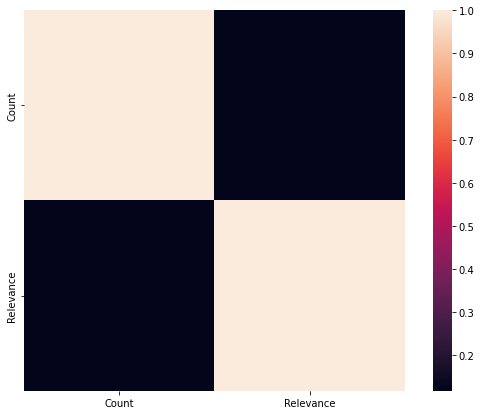

In [ ]:
#view the matrix
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr, square=True)



Given the variables are all positively correlated, they could be collinear, meaning that we wouldn't need that sort of data in our model as it yields too many outliers. 

As a result, we can infer that **Relevance** and **Word Count** are poorly related.

This means that Google doesn't necessarily deems long-tail keywords as more or less relevant than the fat-head counterpart

#SERP Analysis for a Specific Query


---

Do you recall that nice query connecting coffee to weight loss?
That's exactly what we need now as we're going to assign "what coffee is good for weight loss" to a Serp Api payload to ultimately extract some juicy insights from the organic SERP



Let’s set up some variables for the SERPapi call. See their full API documentation for many additional parameters should you need them.

- query: this is the query you want to search for
- location: the country you want to communicate the search is coming from
- lang: the language the query search is in
- country: similar to location, you usually want these to align
- result_num: how many results you want to be returned. 8 usually is the first page, 16 is two pages, etc, etc
- google_domain: the country-specific domain you want to search from (ex. google.com or google.fr). This usually aligns with some of the parameters above.

In [ ]:
#@title SERP Audit with Google Search Api

from serpapi import GoogleSearch

serp_apikey = "fbb0564d15451bc375ec75f75bab1db3ae1a4775682e6c07ec8c685099506cb0" #@param {type:"boolean"}

params = {
    "engine": "google",
    "q": "what coffee is good for weight loss",
    "location": "United Kingdom",
    "google_domain": "google.com",
    "gl": "uk",
    "hl": "en",
    "num": 10,
    "api_key": serp_apikey
}

client = GoogleSearch(params)
data = client.get_dict()

# access "organic results"
df = pd.DataFrame(data['organic_results'])
df

https://serpapi.com/search


,position,title,link,displayed_link,date,snippet,snippet_highlighted_words,about_this_result,about_page_link,cached_page_link,rich_snippet
0,1,Why black coffee is a great drink for weight l...,https://www.insider.com/guides/health/diet-nut...,https://www.insider.com › guides › health › di...,11 Jan 2022,Black coffee is best for weight loss as it doe...,[coffee is best for weight loss],{'source': {'description': 'Insider Inc. is an...,https://www.google.com/search?q=About+https://...,https://webcache.googleusercontent.com/search?...,NaN
1,2,Is Coffee Good For Weight Loss Or Does It Make...,https://www.womenshealthmag.com/weight-loss/a3...,https://www.womenshealthmag.com › weight-loss ...,12 Apr 2022,The bottom line: Plain black coffee may be ben...,"[coffee, beneficial, lose weight]","{'source': {'description': 'Women's Health, pu...",https://www.google.com/search?q=About+https://...,https://webcache.googleusercontent.com/search?...,NaN
2,3,10 WAYS COFFEE CAN HELP YOU LOSE WEIGHT,https://wearelittles.com/blogs/stories/10-ways...,https://wearelittles.com › blogs › stories › 1...,9 Jul 2021,"Amazingly, caffeine increases lipase, an enzym...",[fat],{'source': {'description': 'wearelittles.com w...,https://www.google.com/search?q=About+https://...,https://webcache.googleusercontent.com/search?...,NaN
3,4,10 Best Coffee Hacks For Weight Loss - Eat Thi...,https://www.eatthis.com/coffee-hacks-weight-loss/,https://www.eatthis.com › Weight Loss,13 Dec 2020,"""Some simple ways to add flavor to your coffee...",[coffee],{'source': {'description': 'eatthis.com was fi...,https://www.google.com/search?q=About+https://...,https://webcache.googleusercontent.com/search?...,NaN
4,5,Can Lemon Coffee Help With Weight Loss? The Tr...,https://www.goodhousekeeping.com/health/diet-n...,https://www.goodhousekeeping.com › diet-nutrit...,3 Aug 2022,Let's explore coffee for weight loss. Sowa say...,"[coffee, weight loss, coffee]",{'source': {'description': 'Good Housekeeping ...,https://www.google.com/search?q=About+https://...,https://webcache.googleusercontent.com/search?...,NaN
5,6,The Best Coffee for Weight Loss - FitDay,https://www.fitday.com/fitness-articles/fitnes...,https://www.fitday.com › fitness-articles › fi...,NaN,Drinking your coffee black is by far the best ...,"[coffee, best, weight loss, coffee]",{'source': {'description': 'fitday.com was fir...,https://www.google.com/search?q=About+https://...,https://webcache.googleusercontent.com/search?...,NaN
6,7,"5 amazing ways coffee speeds up weight loss, a...",https://timesofindia.indiatimes.com/life-style...,https://timesofindia.indiatimes.com › diet › p...,10 May 2021,"Weighing low on calories, coffee is also a wei...","[coffee, weight loss, benefits]",{'source': {'description': 'The Times of India...,https://www.google.com/search?q=About+https://...,https://webcache.googleusercontent.com/search?...,NaN
7,8,Can Coffee Increase Your Metabolism and Help Y...,https://www.healthline.com/nutrition/coffee-in...,https://www.healthline.com › Wellness Topics ›...,4 May 2018,"Coffee contains caffeine, a stimulant substanc...","[Coffee, fat]","{'source': {'description': 'Healthline Media, ...",https://www.google.com/search?q=About+https://...,https://webcache.googleusercontent.com/search?...,NaN
8,9,Best Coffee For Weight Loss (Add to Your Diet),https://coffeewitness.com/best-coffee-weight-l...,https://coffeewitness.com › best-coffee-weight...,9 Mar 2022,Black or green coffee is the best one for weig...,"[coffee, best, weight loss]",{'source': {'description': 'coffeewitness.com ...,https://www.google.com/search?q=About+https://...,https://webcache.googleusercontent.com/search?...,{'bottom': {'extensions': ['Coffee: Roast Leve...


In [ ]:
df.to_csv('data.csv')

In [ ]:
#@title check if the file was created
! ls

In [ ]:
#@title Data Cleaning

#remove special characters from values
Data = pd.read_csv('data.csv')
Data['snippet_highlighted_words'] =  Data['snippet_highlighted_words'].str.replace("\[|\"|\]", "")
Data['about_this_result'] = Data['about_this_result'].str.replace("{'source': {'description':", "")
Data['about_this_result'] = Data['about_this_result'].str.replace("https:\/\/serpapi.com\/searches\/6339f21a2c68788a45d8c065\/images\/\w*.png'}}", "")

#remove the first column that is mistakenly iterated win the process
Data = Data.iloc[: , 1:]

#fill NaN value 
Data = Data.fillna(0)
Data.isnull().sum()
Data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


,position,title,link,displayed_link,date,snippet,snippet_highlighted_words,about_this_result,about_page_link,cached_page_link,related_pages_link
0,1,Is Coffee Good for a Hangover? – Cleveland Clinic,https://health.clevelandclinic.org/does-coffee...,https://health.clevelandclinic.org › does-coff...,8 Mar 2022,The caffeine in coffee might not be kind to yo...,'The caffeine in coffee might not be kind to y...,'Cleveland Clinic is a nonprofit American aca...,https://www.google.com/search?q=About+https://...,https://webcache.googleusercontent.com/search?...,0
1,2,Should You Drink Coffee To Cure A Hangover?,https://driftaway.coffee/should-you-drink-coff...,https://driftaway.coffee › should-you-drink-co...,0,Coffee has long been a go-to for curing hangov...,there's little evidence that it actually does ...,'driftaway.coffee was first indexed by Google...,https://www.google.com/search?q=About+https://...,https://webcache.googleusercontent.com/search?...,https://www.google.com/search?hl=en&gl=uk&q=re...
2,3,10 hangover remedies: What works? - CNN.com,http://www.cnn.com/2010/HEALTH/12/30/hangover....,http://www.cnn.com › HEALTH › hangover.remedies,31 Dec 2010,"That said, caffeine narrows your blood vessels...",'caffeine narrows your blood vessels and boost...,'The Cable News Network is a multinational ca...,https://www.google.com/search?q=About+http://w...,http://webcache.googleusercontent.com/search?q...,0
3,4,Can Coffee Cure Hangovers? What You Need to Know!,https://coffeeaffection.com/coffee-for-curing-...,https://coffeeaffection.com › coffee-for-curin...,30 Aug 2022,At least one study has shown that caffeine pai...,'shown that caffeine paired with an anti-infla...,'coffeeaffection.com was first indexed by Goo...,https://www.google.com/search?q=About+https://...,https://webcache.googleusercontent.com/search?...,0
4,5,"The five most popular hangover cures, rated by...",https://qz.com/quartzy/1401348/the-five-most-p...,https://qz.com › quartzy › the-five-most-popul...,29 Sept 2018,Evidence suggests that people who regularly dr...,'people who regularly drink caffeine develop a...,'qz.com was first indexed by Google more than...,https://www.google.com/search?q=About+https://...,https://webcache.googleusercontent.com/search?...,0
5,6,Will Coffee Cure A Hangover Or Just Make It Wo...,https://sprudge.com/will-coffee-cure-a-hangove...,https://sprudge.com › will-coffee-cure-a-hango...,13 May 2021,"Also there is a cure, and it's fool proof. It ...","Also there is a cure, and it's",'Sprudge is an American blog founded by Zacha...,https://www.google.com/search?q=About+https://...,https://webcache.googleusercontent.com/search?...,0
6,7,Can Coffee Really Cure a Hangover? - The Roast...,https://theroasterie.com/blogs/news/can-coffee...,https://theroasterie.com › blogs › news › can-...,24 Oct 2012,"Does coffee help hangovers? ... Yes, coffee ca...","'Yes, coffee can help a hangover'",'theroasterie.com was first indexed by Google...,https://www.google.com/search?q=About+https://...,https://webcache.googleusercontent.com/search?...,0
7,8,"Coffee IS the best hangover cure, scientists s...",https://www.thesun.co.uk/tech/15350708/coffee-...,https://www.thesun.co.uk › tech › coffee-best-...,22 Jun 2021,SCIENTISTS have now woken up and smelled the c...,'be the perfect hangover cure',"""The Sun is a British tabloid newspaper, publ...",https://www.google.com/search?q=About+https://...,0,0
8,9,Have a Hangover? Here's the Fix.-Death Wish Co...,https://www.deathwishcoffee.com/blogs/lifestyl...,https://www.deathwishcoffee.com › blogs › life...,23 Jun 2022,"Sadly, there is no guaranteed cure for a hango...",'there is no guaranteed cure for a hangover','Death Wish Coffee is a coffee brand based in...,https://www.google.com/search?q=About+https://...,https://webcache.googleusercontent.com/search?...,0


In [ ]:
#rename columns
cols = ['Position','Title','Link', 'Breadcrumbs', 'Date', 'Snippet', 'Highlighted Words in Snippet', 'About this Result','About page', 'Cached page', 'Related pages']
Data.columns = cols
Data.head()

,Position,Title,Link,Breadcrumbs,Date,Snippet,Highlighted Words in Snippet,About this Result,About page,Cached page,Related pages
0,1,Is Coffee Good for a Hangover? – Cleveland Clinic,https://health.clevelandclinic.org/does-coffee...,https://health.clevelandclinic.org › does-coff...,8 Mar 2022,The caffeine in coffee might not be kind to yo...,'The caffeine in coffee might not be kind to y...,'Cleveland Clinic is a nonprofit American aca...,https://www.google.com/search?q=About+https://...,https://webcache.googleusercontent.com/search?...,0
1,2,Should You Drink Coffee To Cure A Hangover?,https://driftaway.coffee/should-you-drink-coff...,https://driftaway.coffee › should-you-drink-co...,0,Coffee has long been a go-to for curing hangov...,there's little evidence that it actually does ...,'driftaway.coffee was first indexed by Google...,https://www.google.com/search?q=About+https://...,https://webcache.googleusercontent.com/search?...,https://www.google.com/search?hl=en&gl=uk&q=re...
2,3,10 hangover remedies: What works? - CNN.com,http://www.cnn.com/2010/HEALTH/12/30/hangover....,http://www.cnn.com › HEALTH › hangover.remedies,31 Dec 2010,"That said, caffeine narrows your blood vessels...",'caffeine narrows your blood vessels and boost...,'The Cable News Network is a multinational ca...,https://www.google.com/search?q=About+http://w...,http://webcache.googleusercontent.com/search?q...,0
3,4,Can Coffee Cure Hangovers? What You Need to Know!,https://coffeeaffection.com/coffee-for-curing-...,https://coffeeaffection.com › coffee-for-curin...,30 Aug 2022,At least one study has shown that caffeine pai...,'shown that caffeine paired with an anti-infla...,'coffeeaffection.com was first indexed by Goo...,https://www.google.com/search?q=About+https://...,https://webcache.googleusercontent.com/search?...,0
4,5,"The five most popular hangover cures, rated by...",https://qz.com/quartzy/1401348/the-five-most-p...,https://qz.com › quartzy › the-five-most-popul...,29 Sept 2018,Evidence suggests that people who regularly dr...,'people who regularly drink caffeine develop a...,'qz.com was first indexed by Google more than...,https://www.google.com/search?q=About+https://...,https://webcache.googleusercontent.com/search?...,0
5,6,Will Coffee Cure A Hangover Or Just Make It Wo...,https://sprudge.com/will-coffee-cure-a-hangove...,https://sprudge.com › will-coffee-cure-a-hango...,13 May 2021,"Also there is a cure, and it's fool proof. It ...","Also there is a cure, and it's",'Sprudge is an American blog founded by Zacha...,https://www.google.com/search?q=About+https://...,https://webcache.googleusercontent.com/search?...,0
6,7,Can Coffee Really Cure a Hangover? - The Roast...,https://theroasterie.com/blogs/news/can-coffee...,https://theroasterie.com › blogs › news › can-...,24 Oct 2012,"Does coffee help hangovers? ... Yes, coffee ca...","'Yes, coffee can help a hangover'",'theroasterie.com was first indexed by Google...,https://www.google.com/search?q=About+https://...,https://webcache.googleusercontent.com/search?...,0
7,8,"Coffee IS the best hangover cure, scientists s...",https://www.thesun.co.uk/tech/15350708/coffee-...,https://www.thesun.co.uk › tech › coffee-best-...,22 Jun 2021,SCIENTISTS have now woken up and smelled the c...,'be the perfect hangover cure',"""The Sun is a British tabloid newspaper, publ...",https://www.google.com/search?q=About+https://...,0,0
8,9,Have a Hangover? Here's the Fix.-Death Wish Co...,https://www.deathwishcoffee.com/blogs/lifestyl...,https://www.deathwishcoffee.com › blogs › life...,23 Jun 2022,"Sadly, there is no guaranteed cure for a hango...",'there is no guaranteed cure for a hangover','Death Wish Coffee is a coffee brand based in...,https://www.google.com/search?q=About+https://...,https://webcache.googleusercontent.com/search?...,0


In [ ]:
#@title Download the SERP
Data.to_csv('SERP.csv', index=False)